# Laserkøling Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

I simulationen antager jeg at zeemaneffekten allerede tager sted og at atomet også kan absorbere en foton mens den er i sit exiteret stat, så at jo længe atomet bevæger sig imod laseren, vil alle fotoner blive absorberet

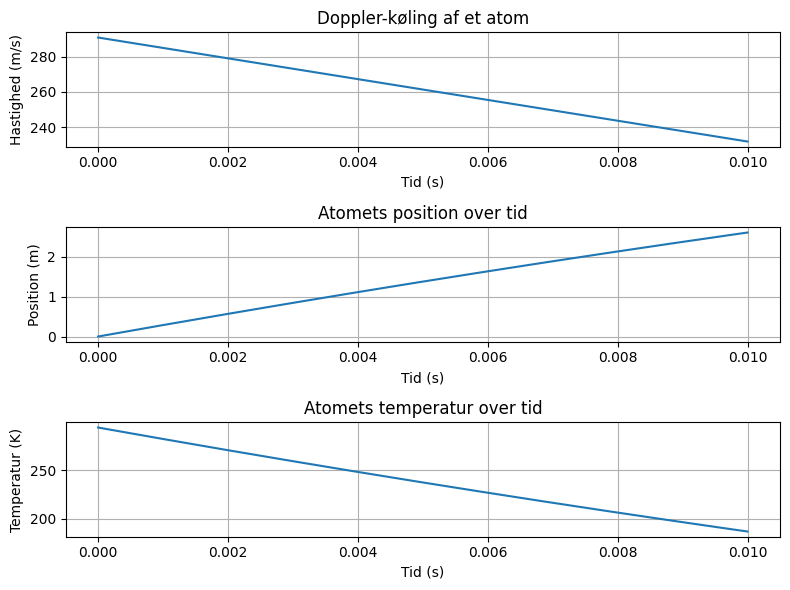

In [2]:
# Fysiske konstanter
mass = 1.44e-25  # Masse af atomet (ca. for et Rubidium-87 atom) i kg
h = 6.62606876e-34
hbar = h/2*np.pi  # Plancks reducerede konstant
k_B = 1.38e-23  # Boltzmanns konstant
Lambda = 780e-9
p_foton = -h/Lambda
T_start = 21 + 273.15 # Start temperatur i K

initial_velocity = np.sqrt((3*k_B*T_start)/mass) # Starthastighed i m/s

def simulate_motion(dt=1e-6, steps=10000):
    """Simulerer atomets bevægelse over tid med en start hastighed."""
    v = np.zeros(steps)
    x = np.zeros(steps)
    t = np.zeros(steps)
    v[0] = initial_velocity  # Start med en initial hastighed
    t[0] = T_start
    
    for i in range(1, steps):
        v[i] = v[i-1] + p_foton/mass
        x[i] = x[i-1] + v[i] * dt
        t[i] = (2/3) * 0.5*mass*v[i]**2 / k_B
    
    return x, v, t

# Kør simuleringen med en start hastighed
x_vals, v_vals, t_vals = simulate_motion()

time = np.linspace(0, len(v_vals) * 1e-6, len(v_vals))

# Plot resultaterne
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(time, v_vals)
ax[0].set_xlabel("Tid (s)")
ax[0].set_ylabel("Hastighed (m/s)")
ax[0].set_title("Doppler-køling af et atom")
ax[0].grid()

ax[1].plot(time, x_vals)
ax[1].set_xlabel("Tid (s)")
ax[1].set_ylabel("Position (m)")
ax[1].set_title("Atomets position over tid")
ax[1].grid()

ax[2].plot(time, t_vals)
ax[2].set_xlabel("Tid (s)")
ax[2].set_ylabel("Temperatur (K)")
ax[2].set_title("Atomets temperatur over tid")
ax[2].grid()

plt.tight_layout()
plt.show()

# Simulation med udgangspunkt i MP's tegning

Brugt data fra [denne side](https://steck.us/alkalidata/rubidium87numbers.1.6.pdf#page=15).
Her er der igen antagelsen om, at vi har en ændrene magnetfelt
Men her bliver alle fotoner optaget, så længe, atomet ikke er i en exiteret tilstand

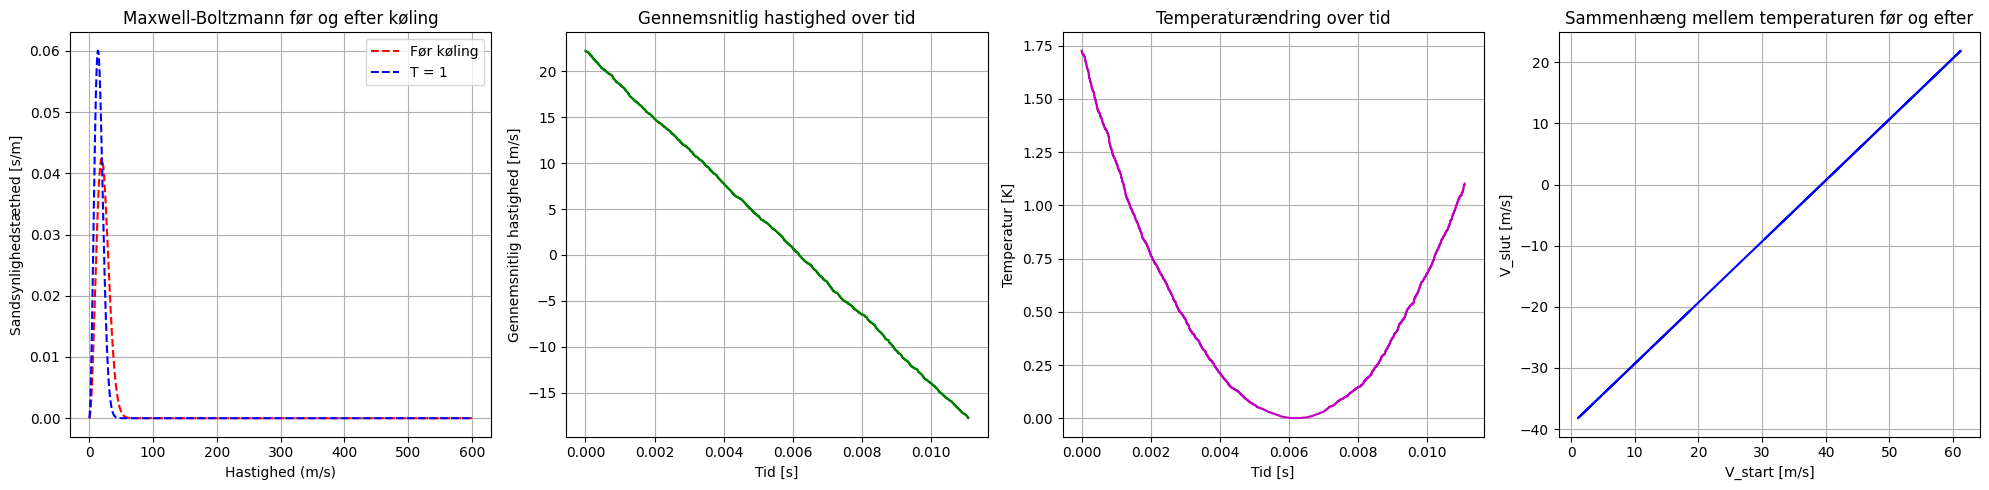

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# Konstanter
k_B = 1.38e-23 # Boltzmanns konstant (J/K)
h = 6.626e-34 # Plancks konstant (J·s)
hbar = h/(2*np.pi) # Planks reduceret konstnt (J·s)
m = 1.443e-25 # Masse af et Rb87 atom (kg)
T =  2 # Temperatur (K)
lambda_laser = 461e-9  # Laserbølgelængde (m)
c = 3e8 # Lysets hastighed (m/s)
tau = 2.27e-9 # Levetid i exiterede tilstand (s)
Gamma = 3.610e7 # Naturlig linjebredde (Hz)
TD = 146e-6 # Doppler limit (K)
s0 = 0.1 # Styrken af laseren (enhedløs)
delta = -Gamma # Detuningen (Hz)
v_start = np.sqrt((3*k_B*T)/m)
v_min = np.sqrt((3*k_B*TD)/m)

p_foton = h / lambda_laser  # Bevægelsesmængde af en foton (kg·m/s)

# Maxwell-Boltzmann fordeling af hastigheder
def maxwell_boltzmann(v, T, m):
    return (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

# Beregning af temperatur
def calculate_temperature(v_atoms):
    return (m * (np.mean(v_atoms)**2) / (3 * k_B))

def calculate_prob(delta):
    return s0/(1+s0+(2*delta/Gamma)**2)

v_vals = np.linspace(0, 600, 10000)  # Hastighedsinterval i m/s
prob_vals = maxwell_boltzmann(v_vals, T, m)
prob_vals /= np.trapezoid(prob_vals, v_vals)  # Normalisering af fordelingen
#prob_vals = prob_vals*100 # Omregner til procent

# Doppler-skift og laserkøling
v_atoms = np.random.choice(v_vals, size=10000, p=prob_vals/np.sum(prob_vals))

# Iterer kølingsprocessen
num_steps = 200000
start_v = np.array(v_atoms)
slut_v = np.array(v_atoms)
mean_v = []
temperatures = []

for steps in range(num_steps):
    
    prob_abs = calculate_prob(delta)
    if  random.rand(1) <= prob_abs:
        # Påvirkning fra fotonens bevægelsesmængde
        Delta_v = p_foton / m  # Hastighedsændring pr. foton
        v_atoms -= Delta_v  # Ændingen i hastighed ved absorption

        # Tilfældig emission (ensartet i alle retninger)
        direction = random.choice([-1,1]) # Bestemmer en tilfældig retning, hvor -1 er fremad, og 1 er tilbage
        if direction == 1:
            v_atoms -= Delta_v
        else:
            v_atoms += Delta_v
        
        for i in range(len(slut_v)):
            # Jeg tager ikke højde for emission
            slut_v[i] -= Delta_v

        mean_v.append(np.mean(v_atoms))
        temperature = calculate_temperature(v_atoms) # Beregn temperatur
        temperatures.append(temperature)

    else:
        mean_v.append(np.mean(v_atoms))
        temperature = calculate_temperature(v_atoms) # Beregn temperatur
        temperatures.append(temperature)


    
    
time = np.linspace(0, len(mean_v) * (2/Gamma), len(mean_v))

# Finder Maxwell-Bosemann fordelingen for atomerne ved dens sluttemperatur
NT = temperatures[-1]
Nprob_vals = maxwell_boltzmann(v_vals, 1, m)
Nprob_vals /= np.trapezoid(Nprob_vals, v_vals)  # Normalisering af fordelingen
#Nprob_vals = Nprob_vals*100 # Omregner til procent

# Plot resultatet
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
# plt.hist(v_atoms, bins=50, density=True, alpha=0.7, color='blue', label='Efter køling')
plt.plot(v_vals, prob_vals, 'r--', label='Før køling')
plt.plot(v_vals, Nprob_vals, 'b--', label='T = 1')
plt.xlabel('Hastighed (m/s)')
plt.ylabel('Sandsynlighedstæthed [s/m]')
plt.legend()
plt.title('Maxwell-Boltzmann før og efter køling')
plt.grid()

plt.subplot(1, 4, 2)
plt.plot(time, mean_v, 'g-')
plt.xlabel('Tid [s]')
plt.ylabel('Gennemsnitlig hastighed [m/s]')
plt.title('Gennemsnitlig hastighed over tid')
plt.grid()

plt.subplot(1, 4, 3)
plt.plot(time, temperatures, 'm-')
plt.xlabel('Tid [s]')
plt.ylabel('Temperatur [K]')
plt.title('Temperaturændring over tid')
plt.grid()

plt.subplot(1, 4, 4)
plt.plot(start_v, slut_v, 'b-')
plt.xlabel('V_start [m/s]')
plt.ylabel('V_slut [m/s]')
plt.title('Sammenhæng mellem temperaturen før og efter')
plt.grid()

plt.tight_layout()
plt.show()




# Carstens Kode

10.01179855548433
10.017697833226494
10.035395666452988
10.058992777421647
10.076690610648141
10.08848916613247
10.1002877216168
10.1002877216168
10.165179776780612
10.2005754432336
10.235971109686588
10.271366776139576
10.247769665170917
10.283165331623906
10.3008631648504
10.283165331623906
10.336258831303388
10.353956664529882
10.424747997435858
10.442445830662352
10.4011508864672
10.395251608725035
10.47784149711534
10.519136441310494
10.530934996794823
10.619424162927293
10.731510440028423
10.819999606160893
10.873093105840375
10.943884438746352
11.050071438105316
11.185754826175105
11.291941825534069
11.46892015779901
11.645898490063951
11.799279711360233
12.064747209757645
12.477696651709174
13.061725148183479
14.00560958692983
15.739997243126252
16.9670470134968
16.74877373703664
16.117551018624827
15.138270913425453
14.442156139850018
13.53956664529882
12.731365594622256
11.899567432977033
11.221150492628093
10.548632830021317
9.828920945477224
9.386475114814871
8.896835062215

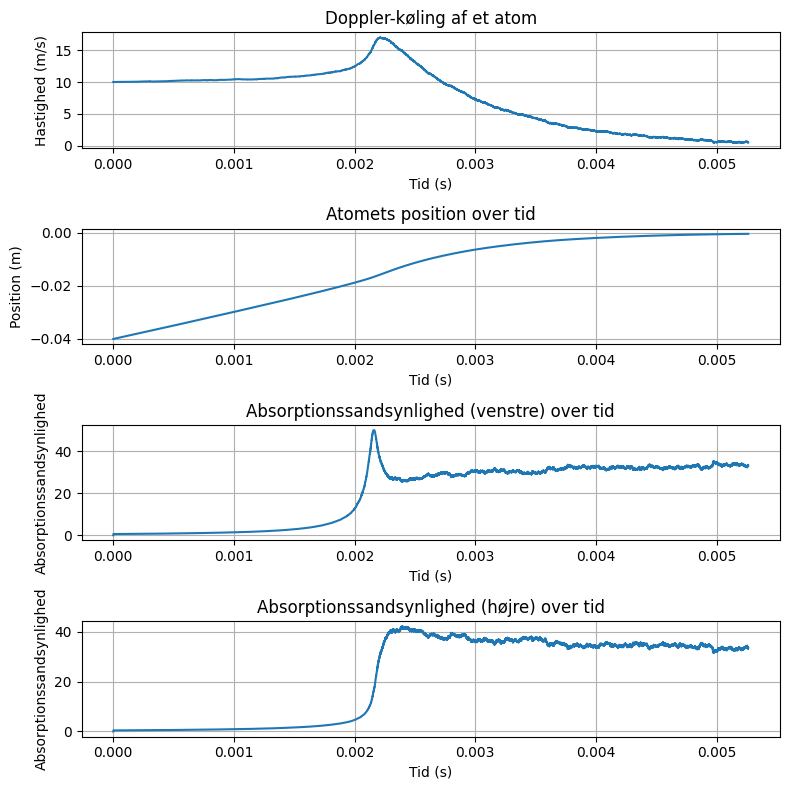

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

#Switches
Doppler=1   #Doppler cooling til (1) , fra (0)
Magnet=1    #Magnetfelt til (1), fra (0)

# Fysiske konstanter
mass = 1.44e-25  # Masse af atomet (ca. for et Rubidium-87 atom) i kg
h = 6.62606876e-34  # Plancks konstant
hbar = h/(2*np.pi)  # Plancks reducerede konstant
k_B = 1.38e-23  # Boltzmanns konstant
mu_B = 9.27e-24  # Bohr magneton
Lambda = 780e-9
k=2*np.pi/Lambda*Doppler # Bølgetal   (Doppler kan slå Doppler køling til/fra)
p_foton = h/Lambda
linewidth=38e6  # Linjebredde i Hz
dt=2/linewidth  # Set timestep til

B_Field_gradient=0.1*Magnet  # Gradient af magnetfeltet i T/m

s0=1  # Saturation parameter
delta_laser = -linewidth/2  # Detuning i Hz

maxsteps=100000

initial_velocity = 10 # Starthastighed i m/s
initial_position = -0.04 #startrposition i meter



def simulate_motion():
    """Simulerer atomets bevægelse over tid med en start hastighed."""
    v = np.zeros(maxsteps)
    x = np.zeros(maxsteps)
    t = np.zeros(maxsteps)
    delta_left = np.zeros(maxsteps)
    delta_right = np.zeros(maxsteps)
    abs_prob_left = np.zeros(maxsteps)
    abs_prob_right = np.zeros(maxsteps)
    v[0] = initial_velocity  # Start med en initial hastighed
    x[0] = initial_position  # Start med en i   nitial hastighed
    for i in range(1, maxsteps):
        delta_left[i]=delta_laser-k*v[i-1]-mu_B*B_Field_gradient*x[i-1]/hbar  # Effektiv detuning = doppler shift - zeeman shift
        delta_right[i]=delta_laser+k*v[i-1]+mu_B*B_Field_gradient*x[i-1]/hbar  
        abs_prob_left[i]=s0/(1+s0+(2*delta_left[i]/linewidth)**2)
        abs_prob_right[i]=s0/(1+s0+(2*delta_right[i]/linewidth)**2)
        rn_left=random.rand()
        rn_right=random.rand()
        v[i] = v[i-1]   # Ingen ændring i hastighed uden absorption
        if rn_left<abs_prob_left[i]:  #absorptionshændelse fra venstre laser
            v[i] = v[i] + p_foton/mass
        if rn_right<abs_prob_right[i]:  #absorptionshændelse fra højre laser
            v[i] = v[i] - p_foton/mass
        x[i] = x[i-1] + v[i] * dt
        t[i] = t[i-1] + dt
        if (i%1000==0):
            print(v[i])
    
    return x, v, t, abs_prob_left, abs_prob_right

# Kør simuleringen med en start hastighed
x_vals, v_vals, t_vals, abs_left, abs_right = simulate_motion()

# Plot resultaterne
fig, ax = plt.subplots(4, 1, figsize=(8, 8))
ax[0].plot(t_vals, v_vals)
ax[0].set_xlabel("Tid (s)")
ax[0].set_ylabel("Hastighed (m/s)")
ax[0].set_title("Doppler-køling af et atom")
ax[0].grid()

ax[1].plot(t_vals, x_vals)
ax[1].set_xlabel("Tid (s)")
ax[1].set_ylabel("Position (m)")
ax[1].set_title("Atomets position over tid")
ax[1].grid()

ax[2].plot(t_vals, abs_left*100)
ax[2].set_xlabel("Tid (s)")
ax[2].set_ylabel("Absorptionssandsynlighed")
ax[2].set_title("Absorptionssandsynlighed (venstre) over tid")
ax[2].grid()

ax[3].plot(t_vals, abs_right*100)
ax[3].set_xlabel("Tid (s)")
ax[3].set_ylabel("Absorptionssandsynlighed")
ax[3].set_title("Absorptionssandsynlighed (højre) over tid")
ax[3].grid()

plt.tight_layout()
plt.show()